# Part 1: Implement Logistic Regression

# Importing necessary Libraries and loading data

In [1]:
# Loading Data 
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
pwd

'/Users/vaishalilalit/Downloads/deep learning'

In [3]:
data=pd.read_csv('/Users/vaishalilalit/Downloads/deep learning/blobs400.csv')

In [4]:
data1=pd.read_csv('/Users/vaishalilalit/Downloads/deep learning/circles500.csv')

# Blobs Dataset with three input features

In [5]:
data.head()

,X1,X2,X3,Class
0,1.418221,2.124375,-0.433905,1
1,1.590404,0.935434,1.510369,1
2,2.311458,-1.026668,1.031930,1
3,1.186782,0.591894,0.563649,1
4,1.661888,4.047231,0.987049,0


# Circles dataset with two input features

In [6]:
data1.head()

,X0,X1,Class
0,0.180647,0.552945,1
1,-0.188674,0.325629,1
2,0.413742,0.931251,0
3,-0.199223,0.902665,0
4,0.488279,-0.341202,1


# Visualizing Data - let's create a 3D scatter plot to get the better understanding of the blob dataset


In [7]:
X=data.drop(['Class'],axis=1)
y=data['Class']

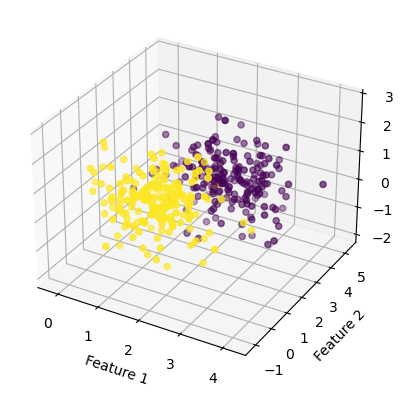

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y, cmap=plt.cm.viridis)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()

## Visualizing Data - let's create a 3D scatter plot to get the better understanding of the circles dataset- From the plot it is quite obvious that our circles data is linearly inseparable


In [9]:
X1=data1.drop(['Class'],axis=1)
y1=data1['Class']

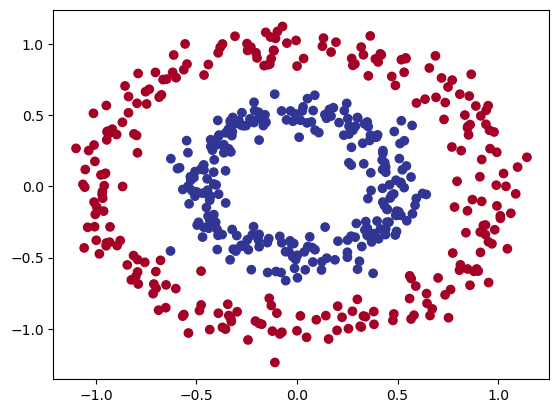

In [10]:
plt.scatter(x=X1.iloc[:, 0], 
            y=X1.iloc[:, 1], 
            c=y1, 
            cmap=plt.cm.RdYlBu);

### PART A
Logistic Regression is a statistical model used for predicting the probability of occuring of an event based on a given 
dataset containing independent variables. It is mainly used for binary classification tasks like spam detection, credit scoring, etc.
In our logistic Regression function, we are first dividing the dataset into training and testing set. Then, we are iteratively updating
the logistic regression parameters (weights) using gradient descent. After this, we calculate the cost function to check for convergence 
(if it does not occur, update the parameters) and at last we evaluate the model's accuracy.


In [285]:
def h1(x):
    return 1/(np.exp(-(theta[0]+theta[1]*x['X0']+theta[2]*x['X1'])+1))

In [287]:
def h(x):
    return 1/(np.exp(-(theta[0]+theta[1]*x['X1']+theta[2]*x['X2']+theta[3]*x['X3']))+1)

The function splits data (80% training, 20% testing), iterates 5000 times, updating theta based on cost function gradient. Convergence is checked against a tolerance. After, it predicts test labels using 'h' and evaluates accuracy. Cost function values are stored for visualization. Though missing key definitions and potential gradient descent issues, the code outlines logistic regression with gradient descent.We had used Batch gradient Descent in this . During discussions at lab we came to know that we need to implement stochastic gradient descent and from next section onwards we have implemented stochastic gradient descent in further parts.

In [288]:
def logistic_reg(h,X,y,n,alpha):   
    
    # Splitting the dataset into Test set (20%) and Train set(80%). 
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,shuffle=True,random_state=42)
    
    cost=[] # Creating a list for storing the cost at each iteration
    iter=5000 # Defining the max. nuber of iterations for the gradient descent
    no_features = n # Number of features present in our dataset. 
    tolerance=0.000001 # Defining the tolerance for convergence, which will act as a stopping criteria
    
    for i in range(0,iter,1):
        # Calculating the cost function J.
        J=-1/2*(len(X_train))*np.sum(y_train*np.log(h(X_train))+ (1-y_train)*np.log(1-h(X_train)))
        cost.append(J) # Apppending the calculated cost to the list.
        
        # Checking whether the convergence has occured or not by checking if the change in the cost is
        # less than the tolerance. If yes, stop the iterations.
        if i>0 and (np.all(np.abs(cost[-2]-cost[-1])<tolerance)):
                print("Convergence occured at {}th iteration ".format(i))
                break
        
        # Updating the theta parameters based on the derivative of the cost function.
        for j in range(no_features + 1):
                if j == 0:  # Updating the bias terms
                    theta[j] = round(theta[j] - alpha * np.sum(h(X_train) - y_train), 4)
                else: # Updating the other parameters
                    theta[j] = round(theta[j] - alpha * np.sum((h(X_train) - y_train) * X_train.iloc[:,j-1]), 4)

        # Predicting the outcomes on the testing set using the updated parameters.
        y_pred = h(X_test)
        # Converting the predictions into the binary outcomes using 0.5 as threshold
        y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
        # calculating the accuracy
        correct_pred=np.sum(y_pred_binary==y_test)
        total_pred=len(y_test)
        accuracy=correct_pred/total_pred
        
    # Plotting the cost function over Iterations
    plt.figure(figsize=(15,8))
    plt.subplot(5, 5, 1)
    plt.plot(cost)
    plt.title(f'Loss Curve')
    plt.xlabel('Iterations')
    return (y_pred_binary, y_test)

### PART B 
Testing our logistic Regression function on the Blobs Dataset and evaluating the model's performance.

Convergence occured at 2953th iteration 
0.9875
Accuracy: 0.9875
Precision: 1.0
Recall: 0.972972972972973
F1 Score: 0.9863013698630138


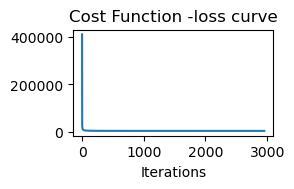

In [289]:
theta=[1,2,3,4]
y_pred_binary, y_test=logistic_reg(h,X,y,3,0.008)
accuracy = accuracy_score(y_pred_binary, y_test)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the accuracy
print(f"Accuracy: {accuracy}")
# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

## Blobs Dataset

### Observations:
The logistic regression model has converged at the 2953rd iteration, which suggests that the gradient descent algorithm has found a set of parameters (weights) for which the change in the loss function is smaller than the defined tolerance level.
The accuracy of the model is very high at 98.75%, indicating that the model is able to correctly classify a high percentage of the cases.
The precision is 100%, which means that every instance predicted as positive by the model is actually positive.
The recall is slightly lower at approximately 97.30%, suggesting that there are a few positive instances that the model did not identify.
The F1 score, which is the harmonic mean of precision and recall, is also very high at approximately 98.63%, indicating a well-balanced model between precision and recall.


### Conclusions:
The logistic regression model has performed extremely well on this particular dataset. This is evident from the high values of accuracy, precision, recall, and F1 score.
Given the high precision and recall, it can be inferred that the model has a good fit and is neither overfitting nor underfitting significantly.
The loss curve plot, although not completely visible, seems to show a rapid decrease and stabilization which correlates with the convergence of the model.
The model parameters (theta) have been adjusted well by the gradient descent algorithm to minimize the cost function effectively.

0.52
Accuracy: 0.52
Precision: 0.53125
Recall: 0.34
F1 Score: 0.4146341463414634


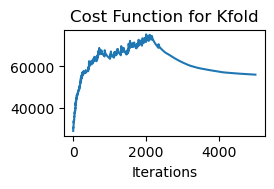

In [15]:
theta=[1,2,3]
y_pred_binary, y_test=logistic_reg(h1,X1,y1,2,0.00001)
accuracy = accuracy_score(y_pred_binary, y_test)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the accuracy
print(f"Accuracy: {accuracy}")
# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

## Circles Dataset

### Observations:
The accuracy of 0.52 suggests that the model is only slightly better than random guessing for a binary classification task.
The precision of approximately 0.5312 indicates that when the model predicts an event, it is correct around 53.12% of the time.
The recall of 0.34 is quite low, meaning the model correctly identifies only 34% of all actual events.
The F1 score, which balances precision and recall, is also low at approximately 0.4146, reflecting the model's limited effectiveness in this context.


### Conclusions:
The performance metrics suggest that the model is not performing well on the given dataset. It has limited predictive power, as evidenced by the low recall and F1 score.
This is due to the circle's dataset for not being linearly seperable, Thus expaining the low accuracy we are getting for our logistic regression model.

# PART C -Implementing Shallow Neural Networks

In the third part, we have implemented a shallow neural network with one input layer, one hidden
layer and one outer layer. We have used the forward and backward propagation algorithms, and 
updated the weights and biases through gradient descent, and finally evaluated the model's performance on a test set.
We have used batch Gradient descent for this secton. We have also implemented the shallow Neural network using
stochastic Gradient Descent.

## Batch Gradient Descent:

The sigmoid function and its derivative are defined to serve as the activation function in the network, 
providing a mechanism to introduce non-linearity into the model. The input_layer converts the input from
a DataFrame into a NumPy array and then are linearly combined with initialized weights and a bias term added in
the hidden layer. After this output layer computes the activations, which are used to make final predictions.
The cost function computes the binary cross-entropy loss, which quantifying the difference between the 
predicted probabilities and actual labels. 
During forward_prop, the network computes intermediate activations and final predictions by sequentially applying 
the input, hidden, and output layer computations. backward_prop then calculates the gradients of the loss with 
respect to the weights and biases, effectively determining how these parameters should be adjusted to minimize the loss. 
The grad_update function updates the parameters in the opposite direction of the gradients, scaled by a learning 
rate. This iterative optimization is performed for a predefined number of epochs or until convergence is detected
when the change in loss between epochs is less than a threshold. The predict function uses the trained weights and 
biases to make predictions on new data, providing a way to evaluate the trained model. Finally, the train_model 
function encapsulates the training process. It initializes the weights and biases, iteratively updates the parameters
through forward and backward propagation, and returns the training loss history and the final trained model parameters.


In [360]:
def sigmoid(x): # Defined the sigmoid Activation Function
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x): # We defined the derivative of the sigmoid function.
                           # This will be used in the backpropogation process to calculate gradients
    return sigmoid(x) * (1 - sigmoid(x))

def input_layer(no_of_features,x): # Processes the input data by transforming a Dataframe into
                                   # a Numpy Array with rows as features.
    X = np.zeros((no_of_features, len(x)))
    for i in range(no_of_features):
        X[i] = x.iloc[:, i]
    return X

def hidden_layer(W,B,X,no_of_neurons): # It computes the activation values form the layers.
    no_of_features, num_samples = X.shape
    a = np.zeros((no_of_neurons, num_samples))
    for i in range(no_of_neurons):
        for j in range(no_of_features):
            a[i]+=W[i][j]*X[j] # Linear combination of weights and inputs
            a[i]+=B[i] # Adding the Bias term
    return a,sigmoid(a) # Applying the sigmoid function to the linear Combination

# Calculates the final output using the Activations from the hidden layers
def output_layer(W,B,a_previous,no_outputs):
    no_of_features, num_samples = a_previous.shape
    a_output=np.zeros((no_outputs,num_samples))
    
    for i in range(W.shape[0]):
        a_output+=a_previous[i]*W[i][0] # This is the weighted sum of the previous layers activations
    a_output=a_output+B # Adding a Bias term
    return a_output,sigmoid(a_output)

# Calculating the cost (loss) using the binary cross-entropy
def cost_function(y_pred,y,N):
        J=-1/2*(N)*np.sum(y*np.log(y_pred[0])+ (1-y)*np.log(1-y_pred[0]))
        return J

# Function to perform forward propogation through the network to give the final outputs.
def forward_prop(no_outputs,num_samples,W1,B1,W2,B2,X_train,no_of_neurons):
    X=input_layer(X_train.shape[1],X_train) # Preparing the Input layer
    Z1,A1=hidden_layer(W1,B1,X,no_of_neurons) # Computing hidden layers activation
    Z2,A2=output_layer(W2,B2,A1,no_outputs) # Computing hidden layers activation
    return A1,Z1,A2,Z2,X

# Function to perform the Backward Propogation as 
def backward_prop(Z2,A1,y_pred,y,Z1,X,W2):
    error2 = (y_pred[0] - y).to_numpy().reshape(-1, 1) # calculating the output layer error 
    grad_W2 = np.dot(error2.T * sigmoid_derivative(Z2), A1.T).T # Gradient for W2
    grad_B2 = np.dot(error2.T,sigmoid_derivative(Z2).T) # Gradient for B2
    error1 = np.dot(W2, error2.T) * sigmoid_derivative(Z2) # Propogating the errors back to the hidden layer 
    grad_W1=np.dot(error1 * sigmoid_derivative(Z1), X.T) # Gradient for W1
    mean_error1=np.mean(error1, axis=0, keepdims=True) # This is used for finding Mean error for B1 gradient calculation
    grad_B1=np.dot(mean_error1,sigmoid_derivative(Z1).T).T  # Gradient for B1

    return grad_W2,grad_B2,grad_W1,grad_B1 

# Updates the weights and biases using the gradients calculated from back propagation
def grad_update(lr, W1, B1, W2, B2, grad_W1, grad_B1, grad_W2, grad_B2):
    W1 -= lr * grad_W1 # Update W1
    B1 -= lr * grad_B1.mean(axis=1, keepdims=True)  # Update B1
    W2 -= lr * grad_W2  # Update W2
    B2 -= lr * grad_B2.flatten() # Update B2
    return W1,B1,W2,B2

# Function to make predictions on the random dataset.
def predict(X,W1,B1,W2,B2,no_of_neurons):
    A1, _, y_pred, _, _ = forward_prop(1, X_test.shape[0],W1,B1,W2,B2,X_test,no_of_neurons)
    return y_pred

In [17]:
def train_model(X_train,y,lr,no_of_neurons,no_outputs):
    
    # We are first Determining the number of features from the training data.
    # This is essential for initializing the weights correctly.
    no_of_features=X_train.shape[1]
    # Now, Initializing weights and biases for the hidden layer (W1, B1) and the output layer (W2, B2).
    # Random initialization helps to break symmetry and ensure that the model learns diverse features during training.
    W1=np.random.randn(no_of_neurons,no_of_features)
    B1=np.random.randn(no_of_neurons, 1)
    W2=np.random.randn(no_of_neurons,no_outputs)
    B2=np.random.randn(no_outputs)

    # Begin the training over specified no. of epochs
    for epoch in range(epochs):
        
        # First, we perform forward propagation to calculate predictions. This involves passing the data through the 
        # input, hidden, and output layers of the network.
        A1,Z1,y_pred,Z2,X=forward_prop(no_outputs,X_train.shape[0],W1,B1,W2,B2,X_train,no_of_neurons)
        
        # Now we compute the loss (cost) using the predictions and actual labels.
        # The cost function measures how well the network is performing; the goal is to minimize this value.
        loss=cost_function(y_pred,y,X_train.shape[0])
        cost.append(loss)
        # Checking for Convergence
        if epoch>0 and (np.all(np.abs(cost[-2]-cost[-1])<0.01)):
            print("Convergence occured at {}th epoch ".format(epoch))
            break
        # This part is optional. Here, we are printing the loss every 200 epochs to monitor training progress.
        if epoch%200==0:
            print(f"Epoch {epoch}: Loss = {loss}")
        
        # Now we perform backward propagation to calculate gradients.This step computes how much each weight
        # and bias contributed to the loss and adjusts them to reduce it.
        grad_W2,grad_B2,grad_W1,grad_B1=backward_prop(Z2,A1,y_pred,y,Z1,X,W2)
        # Updating the weights and biases based on their gradients and the learning rate. The learning rate
        # controls how big of a step to take in the direction that reduces the loss.
        W1,B1,W2,B2=grad_update(lr, W1, B1, W2, B2, grad_W1, grad_B1, grad_W2, grad_B2)
        
    return cost,W1,B1,W2,B2 # Return the cost value, along with weights and biases.

This is for Circles Dataset
Epoch 0: Loss = 121295.46428024016
Epoch 200: Loss = 38862.276476252715
Epoch 400: Loss = 9427.547470379937
Epoch 600: Loss = 6539.127555275911
Epoch 800: Loss = 5308.418614983591
Epoch 1000: Loss = 4603.209773813401
Epoch 1200: Loss = 4113.510631535945
Epoch 1400: Loss = 3742.1534645149777
Epoch 1600: Loss = 3447.3369009706403
Epoch 1800: Loss = 3206.4562110637644
Epoch 2000: Loss = 3005.359854295
Epoch 2200: Loss = 2834.515058587217
Epoch 2400: Loss = 2687.2339727831168
Epoch 2600: Loss = 2558.685977102469
Epoch 2800: Loss = 2445.2963166031905
Epoch 3000: Loss = 2344.362810615534
Epoch 3200: Loss = 2253.803963686911
Epoch 3400: Loss = 2171.989216020033
Epoch 3600: Loss = 2097.621948235156
Epoch 3800: Loss = 2029.6571683436327
Epoch 4000: Loss = 1967.2424919398768
Epoch 4200: Loss = 1909.675080656487
Epoch 4400: Loss = 1856.3697180907463
Epoch 4600: Loss = 1806.8347936719292
Epoch 4800: Loss = 1760.6539916811216
Epoch 5000: Loss = 1717.4721573923578
Epoch 5

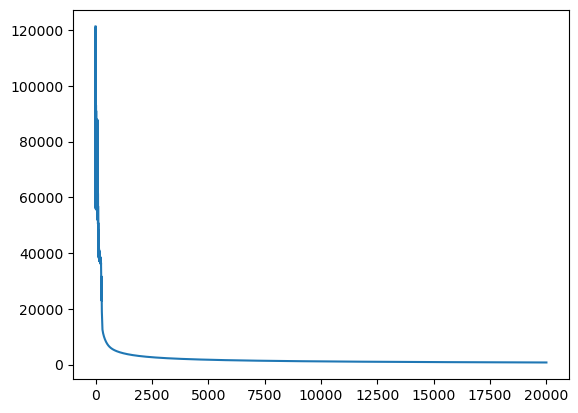

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.20,shuffle=True,random_state=42)
# print(X_train.shape)
print("This is for Circles Dataset")
epochs=20000
cost=[]
cost,W1,B1,W2,B2=(train_model(X_train,y_train,0.08,no_of_neurons=5,no_outputs=1))
# print(cost)
plt.plot(cost)
y_pred=predict(X_test,W1,B1,W2,B2,no_of_neurons=5)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred[0]]
print("This is for Circles Dataset")
print(y_pred[0],len(y_test))
accuracy = accuracy_score(y_pred, y_test)
print(len(y_pred),len(y_test))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the accuracy

print(f"Accuracy: {accuracy}")
# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Circles Dataset
## Observations from the Shallow Network Training:

1.  The plotted loss curve shows a steep decline initially, which flattens out as epochs increase, indicating
    that the model is learning and the error is reducing.
2.  The loss values in the later epochs are still declining, though at a much slower rate, which suggests that
    the model may still be improving slightly with additional training.
3.  The model achieved an accuracy, precision, recall, and F1 score of 1.0 on the test set. These are ideal metrics,
    indicating that the model has perfectly classified the test data. 
4.  With 2 neurons in the hidden layer, we were getting the accuracy of approx. 92%. As we increased the no. of neurons
    to 5, we got the 100% accuracy.

## Comparison with Logistic Regression:

* Compared to the previously obtained logistic regression results, the neural network has demonstrated significantly better performance.
* The logistic regression model had an accuracy of 0.52, precision of approximately 0.5312, recall of 0.34, and an F1 score of around 0.4146.
* These metrics indicate a performance barely above random chance.
* The superior performance of the shallow neural network is likely due to its ability to capture the non-linear boundaries that are 
  characteristic of the Circles Dataset, which logistic regression cannot do as it is a linear model.

## Conclusions:

The neural network's perfect performance metrics on the test set indicate that it has effectively learned the decision boundary
of the Circles Dataset, which is known for not being linearly separable. The improvement over logistic regression underscores the
neural network's advantage in handling complex patterns that require modeling non-linearity.

This is for Blobs Dataset
(320, 3)
Epoch 0: Loss = 40131.0956298922
Epoch 200: Loss = 3040.832438994051
Epoch 400: Loss = 2881.3228644351884
Epoch 600: Loss = 2822.917060400721
Epoch 800: Loss = 2769.669517425981
Epoch 1000: Loss = 2722.873145736275
Epoch 1200: Loss = 2689.631542148062
Epoch 1400: Loss = 2668.882601919209
Epoch 1600: Loss = 2657.528057977036
Convergence occured at 1794th epoch 
0 80
80 80
Accuracy: 0.975
Precision: 1.0
Recall: 0.9459459459459459
F1 Score: 0.9722222222222222


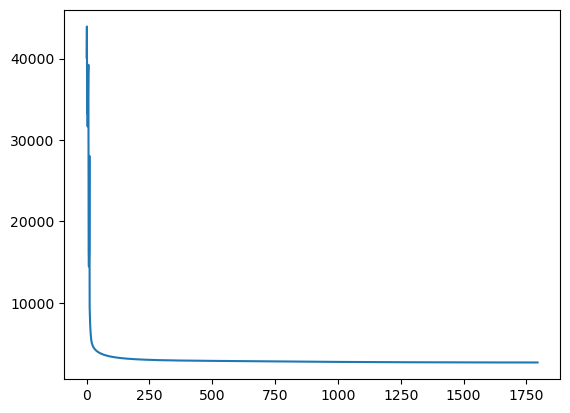

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,shuffle=True,random_state=42)
print("This is for Blobs Dataset")
print(X_train.shape)
cost=[]
cost,W1,B1,W2,B2=(train_model(X_train,y_train,0.1,no_of_neurons=3,no_outputs=1))
# print(cost)
plt.plot(cost)
y_pred=predict(X_test,W1,B1,W2,B2,no_of_neurons=3)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred[0]]

print(y_pred[0],len(y_test))
accuracy = accuracy_score(y_pred, y_test)
print(len(y_pred),len(y_test))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")
# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


# Blobs Dataset
## Observations:

* The loss rapidly decreases and stabilizes, as seen in the loss curve plot, indicating effective learning during the training process.
* The accuracy of the model is extremely high at 97.5%, which shows the model's ability to correctly classify the vast majority of the test data.
* The precision is perfect at 100%, meaning there were no false positives among the predictions made by the model.
* The recall is also very high at approximately 94.59%, indicating that the model successfully identified most of the positive instances.
* The F1 score is approximately 97.22%, reflecting a strong balance between precision and recall, which are both critical for the 
  effectiveness of a classification model.

## Conclusion:

The neural network demonstrates really good performance on the 'Blobs' dataset, which is a typically linearly separable problem. 
This is confirmed by the high values of accuracy, precision, recall, and F1 score.The perfect precision and high recall suggest 
the model is well-fitted; it's successfully capturing the underlying distribution of the data without overfitting or underfitting.
The loss curve shows that the model's learning process is stable and converges to a solution effectively, which is indicated by 
the sharp decline in loss followed by a plateau. Comparing the neural network's performance to the previous logistic regression results,
it's evident that the shallow neural network is capable of handling linearly separable data with a high degree of accuracy, similar to the logistic
regression model.

# Part 3 : Using Stochastic Gradient Descent

The changes made to transition from Batch Gradient Descent to Stochastic Gradient Descent (SGD) involve updating the cost function and the process of weight updates during training. In Batch Gradient Descent, the cost function is calculated by averaging the errors over the entire dataset. However, in Stochastic Gradient Descent, we update the cost function to compute the error for each individual sample, rather than averaging over all samples. During training, instead of passing the entire dataset, we randomly select one sample at a time and perform forward propagation and backpropagation on that single sample. After computing the gradient based on this individual sample, we update the weights of the model. This process is repeated iteratively for each sample in the dataset, continuously updating the weights based on the errors of individual samples. By updating the weights after each sample, Stochastic Gradient Descent tends to converge faster and is more suitable for large datasets or datasets with noisy or sparse features.

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
def input_layer1(no_of_features,x,random_idx):
    X = np.zeros((no_of_features, 1))
    for i in range(no_of_features):
        X[i] = x.iloc[random_idx,i]
    return X
def hidden_layer1(W,B,X,no_of_neurons):
    no_of_features,_ = X.shape
    a = np.zeros((no_of_neurons, 1))
    for i in range(no_of_neurons):
        for j in range(no_of_features):
            a[i]+=W[i][j]*X[j]
            a[i]+=B[i]
    return a,sigmoid(a) 
def output_layer1(W,B,a_previous,no_outputs):
    no_of_features, num_samples = a_previous.shape
    a_output=np.zeros((no_outputs,1))    
    for i in range(W.shape[0]):
        a_output+=a_previous[i]*W[i][0]
    a_output=a_output+B
    return a_output,sigmoid(a_output)
def cost_function1(y_pred,y):
        J=-(y*np.log(y_pred[0])+ (1-y)*np.log(1-y_pred[0]))
        return J.values[0]
def forward_prop1(no_outputs,W1,B1,W2,B2,X_train,no_of_neurons,random_idx):
    X=input_layer1(X_train.shape[1],X_train,random_idx)
    Z1,A1=hidden_layer1(W1,B1,X,no_of_neurons)
    Z2,A2=output_layer1(W2,B2,A1,no_outputs)
    return A1,Z1,A2,Z2,X
def backward_prop1(Z2,A1,y_pred,y,Z1,X,W2,random_idx):
    error2 = (y_pred[0] - y.iloc[random_idx]).to_numpy().reshape(-1, 1) 
    grad_W2 = np.dot(error2.T * sigmoid_derivative(Z2), A1.T).T
    grad_B2 = np.dot(error2.T,sigmoid_derivative(Z2).T)    
    error1 = np.dot(W2, error2.T) * sigmoid_derivative(Z2)
    grad_W1=np.dot(error1 * sigmoid_derivative(Z1), X.T)
    mean_error1=np.mean(error1, axis=0, keepdims=True)
    grad_B1=np.dot(mean_error1,sigmoid_derivative(Z1).T).T
    return grad_W2,grad_B2,grad_W1,grad_B1

def grad_update1(lr, W1, B1, W2, B2, grad_W1, grad_B1, grad_W2, grad_B2):    
    W1 -= lr * grad_W1
    B1 -= lr * grad_B1.mean(axis=1, keepdims=True)
    W2 -= lr * grad_W2
    B2 -= lr * grad_B2.flatten()
    return W1,B1,W2,B2
def predict1(X,W1,B1,W2,B2,no_of_neurons):
    for i in range(len(X)):
        y_pred.append(forward_prop1(1,W1,B1,W2,B2,X,no_of_neurons,i)[2])
    return y_pred

In [107]:
def train_model1(X_train,y,lr,no_of_neurons,no_outputs,iterations):
    no_of_features=X_train.shape[1]
    W1=np.random.randn(no_of_neurons,no_of_features)
    B1=np.random.randn(no_of_neurons, 1)
    W2=np.random.randn(no_of_neurons,no_outputs)
    B2=np.random.randn(no_outputs)
    J_running=0
    J_running_prev=0
    for iteration in range(iterations):
        random_idx = np.random.choice(X_train.shape[0], size=1, replace=False)
        random_sample = X_train.iloc[random_idx]
        y_sample=y.iloc[random_idx]
        A1,Z1,y_pred,Z2,X=forward_prop1(no_outputs,W1,B1,W2,B2,X_train,no_of_neurons,random_idx)
#         print("hi",y_pred)
        J_current=cost_function1(y_pred,y_sample)                
        grad_W2,grad_B2,grad_W1,grad_B1=backward_prop1(Z2,A1,y_pred,y,Z1,X,W2,random_idx)
        W1,B1,W2,B2=grad_update1(lr, W1, B1, W2, B2,grad_W1, grad_B1, grad_W2, grad_B2)
        J_running+=J_current
        if iteration%X_train.shape[0]==0 and iteration>0:
            if (np.all(np.abs(J_running_prev-J_running)<0.0001)):
                print("Convergence occured at {}th epoch ".format(iteration/X_train.shape[0]))            
                break
            epoch=iteration/X_train.shape[0]
            if epoch%10==0:
                print(f"Epoch {epoch}: Loss = {J_running/X_train.shape[0]}")
            J_running_prev=J_running
            cost.append(J_running/X_train.shape[0])
            J_running=0
            
        
    return cost,W1,B1,W2,B2

(320, 3)
This is for Blobs Dataset
Epoch 10.0: Loss = 0.2365886405896655
Epoch 20.0: Loss = 0.18159168481421822
Epoch 30.0: Loss = 0.1397472390389667
Epoch 40.0: Loss = 0.115061556773466
Epoch 50.0: Loss = 0.1358371624425962
Epoch 60.0: Loss = 0.12611636393343362
Epoch 70.0: Loss = 0.0824789669077905
Epoch 80.0: Loss = 0.08784537545503095
Epoch 90.0: Loss = 0.08072074978861844
Epoch 100.0: Loss = 0.07147678037235337
Epoch 110.0: Loss = 0.06801948233882707
Epoch 120.0: Loss = 0.09662349349248821
0 80
80 80
Accuracy: 0.9875
Precision: 1.0
Recall: 0.972972972972973
F1 Score: 0.9863013698630138


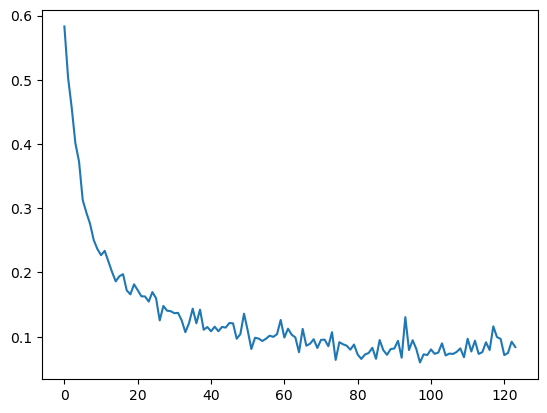

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,shuffle=True,random_state=42)
print(X_train.shape)
print("This is for Blobs Dataset")
cost=[]
y_pred=[]
cost,W1,B1,W2,B2=(train_model1(X_train,y_train,0.04,no_of_neurons=3,no_outputs=1,iterations=40000))
# print(cost)
plt.plot(cost)
y_pred=predict(X_test,W1,B1,W2,B2,no_of_neurons=3)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred[0]]

print(y_pred[0],len(y_test))
accuracy = accuracy_score(y_pred, y_test)
print(len(y_pred),len(y_test))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")
# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

(400, 2)
This is for Circles Dataset
Epoch 10.0: Loss = 0.6695480215064745
Epoch 20.0: Loss = 0.6111091469602048
Epoch 30.0: Loss = 0.5897353515304014
Epoch 40.0: Loss = 0.5679047481397661
Epoch 50.0: Loss = 0.50115218725433
Epoch 60.0: Loss = 0.4120344253775558
Epoch 70.0: Loss = 0.3082614547669456
Epoch 80.0: Loss = 0.249992975599702
Epoch 90.0: Loss = 0.2062508570598553
Epoch 100.0: Loss = 0.1859746818375564
Epoch 110.0: Loss = 0.17143571516729295
Epoch 120.0: Loss = 0.15876909017005467
Epoch 130.0: Loss = 0.15055973800725225
Epoch 140.0: Loss = 0.14950085262960372
Epoch 150.0: Loss = 0.12598973873624458
Epoch 160.0: Loss = 0.12696178561737267
Epoch 170.0: Loss = 0.13932527169160613
Epoch 180.0: Loss = 0.1283797974262826
Epoch 190.0: Loss = 0.11660754690651245
0 100
100
100 100
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


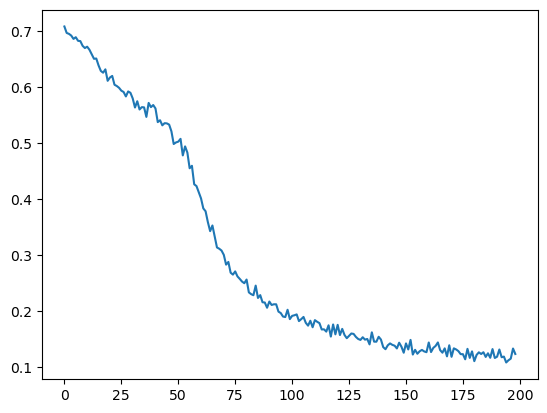

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.20,shuffle=True,random_state=42)
print(X_train.shape)
print("This is for Circles Dataset")
cost=[]
cost,W1,B1,W2,B2=(train_model1(X_train,y_train,0.08,no_of_neurons=5,no_outputs=1,iterations=80000))
# print(cost)
plt.plot(cost)
y_pred=[]
y_pred=predict1(X_test,W1,B1,W2,B2,no_of_neurons=5)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]

print(y_pred[0],len(y_test))
print(len(y_pred))
accuracy = accuracy_score(y_pred, y_test)
print(len(y_pred),len(y_test))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")
# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# PART 4 - Implementing Shallow Neural Network on Fashion MNIST.

## Our Assigned Classes are Coats and Dresses

### Loading Fashion MNIST Datasets

In [290]:
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from path"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [291]:
(train_imgs, train_labels) = load_mnist('/Users/vaishalilalit/Downloads/deep learning/dataset','train')
(test_imgs, test_labels) = load_mnist('/Users/vaishalilalit/Downloads/deep learning/dataset','t10k')

### Normalizing Image Data and getting choosen category  labels 

In [292]:
# Initialize empty lists to store preprocessed training and testing images and labels
new_train_imgs = []
new_train_labels = []
new_test_imgs = []
new_test_labels = []

# Iterate through each image in the training set
for i in range(len(train_imgs)):
    # Check if the label corresponds to class 3 or class 4
    if train_labels[i] == 3 or train_labels[i] == 4:
        # Normalize the image pixel values and append to the list of preprocessed training images
        new_train_imgs.append(train_imgs[i] / 255)
        # Map the labels: class 3 to 0 and class 4 to 1, and append to the list of preprocessed training labels
        if train_labels[i] == 3:
            new_train_labels.append(0)
        else:
            new_train_labels.append(1)

# Iterate through each image in the testing set
for i in range(len(test_imgs)):
    # Check if the label corresponds to class 3 or class 4
    if test_labels[i] == 3 or test_labels[i] == 4:
        # Normalize the image pixel values and append to the list of preprocessed testing images
        new_test_imgs.append(test_imgs[i] / 255)
        # Map the labels: class 3 to 0 and class 4 to 1, and append to the list of preprocessed testing labels
        if test_labels[i] == 3:
            new_test_labels.append(0)
        else:
            new_test_labels.append(1)

## Loading Shallow Neural Network  -Stochastic Gradient Descent


In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
def input_layer2(no_of_features,x,random_idx):
    X = np.zeros((no_of_features, 1))
    for i in range(no_of_features):
        X[i] = x.iloc[random_idx,i]
    return X
def hidden_layer2(W,B,X,no_of_neurons):
    no_of_features,_ = X.shape
    a = np.zeros((no_of_neurons, 1))
    for i in range(no_of_neurons):
        for j in range(no_of_features):
            a[i]+=W[i][j]*X[j]
            a[i]+=B[i]
    return a,sigmoid(a) 
def output_layer2(W,B,a_previous,no_outputs):
    no_of_features, num_samples = a_previous.shape
    a_output=np.zeros((no_outputs,1))    
    for i in range(W.shape[0]):
        a_output+=a_previous[i]*W[i][0]
    a_output=a_output+B
    return a_output,sigmoid(a_output)
def cost_function2(y_pred,y):        
        J=-(y*np.log(y_pred)+ (1-y)*np.log(1-y_pred))
        return J.values[0]
def forward_prop2(no_outputs,W1,B1,W2,B2,X_train,no_of_neurons,random_idx):
    X=input_layer2(X_train.shape[1],X_train,random_idx)
    Z1,A1=hidden_layer2(W1,B1,X,no_of_neurons)
    Z2,A2=output_layer2(W2,B2,A1,no_outputs)
    return A1,Z1,A2,Z2,X
def backward_prop2(Z2,A1,A2,y,Z1,X,W2,random_idx):
    error2 = (A2[0] - y.iloc[random_idx]).to_numpy().reshape(-1, 1) 
    grad_W2 = np.dot(error2.T * sigmoid_derivative(Z2), A1.T).T
    grad_B2 = np.dot(error2.T,sigmoid_derivative(Z2).T)    
    error1 = np.dot(W2, error2.T) * sigmoid_derivative(Z2)
    grad_W1=np.dot(error1 * sigmoid_derivative(Z1), X.T)
    mean_error1=np.mean(error1, axis=0, keepdims=True)
    grad_B1=np.dot(mean_error1,sigmoid_derivative(Z1).T).T
    return grad_W2,grad_B2,grad_W1,grad_B1

def grad_update2(lr, W1, B1, W2, B2, grad_W1, grad_B1, grad_W2, grad_B2):   
    W1 -= lr * grad_W1
    B1 -= lr * grad_B1.mean(axis=1, keepdims=True)
    W2 -= lr * grad_W2
    B2 -= lr * grad_B2.flatten()
    return W1,B1,W2,B2
def predict2(X,W1,B1,W2,B2,no_of_neurons):
    for i in range(len(X)):
        y_pred.append(forward_prop2(1,W1,B1,W2,B2,X,no_of_neurons,i)[2])
    return y_pred

In [119]:
def train_model2(X_train, y, lr, no_of_neurons, no_outputs):
    # Initialize weights and biases randomly
    no_of_features = X_train.shape[1]
    W1 = np.random.normal(0, 0.01, size=(no_of_neurons, no_of_features))
    B1 = np.random.normal(0, 0.01, size=(no_of_neurons, 1))
    W2 = np.random.normal(0, 0.01, size=(no_of_neurons, no_outputs))
    B2 = np.random.normal(0, 0.01, size=no_outputs)
    epochs = 48000
    J_running = 0
    J_running_prev = 0
    cost = []
    for epoch in range(epochs):
        # Select a random sample
        random_idx = np.random.choice(X_train.shape[0], size=1, replace=False)
        random_sample = X_train.iloc[random_idx]
        y_sample = y.iloc[random_idx]       
        # Forward propagation
        A1, Z1, A2, Z2, X = forward_prop1(no_outputs, W1, B1, W2, B2, X_train, no_of_neurons, random_idx)
        J_current = cost_function1(A2[0], y_sample)        
        # Print loss every 1000 iterations
        if epoch % 1000 == 0:
            print(f"Iteration {epoch}: Loss = {J_current}")      
        # Backward propagation
        grad_W2, grad_B2, grad_W1, grad_B1 = backward_prop1(Z2, A1, A2, y, Z1, X, W2, random_idx)   
        # Gradient update
        W1, B1, W2, B2 = grad_update1(lr, W1, B1, W2, B2, grad_W1, grad_B1, grad_W2, grad_B2)  
        # Accumulate running loss
        J_running += J_current   
        # Print loss every epoch
        if epoch % X_train.shape[0] == 0 and epoch > 0:
            print(f"Epoch {epoch / X_train.shape[0]}: Loss = {J_running}")
            J_running_prev = J_running
            cost.append(J_running)
            J_running = 0   
            # Check for convergence
            if np.all(np.abs(J_running_prev - J_running) < 0.01):
                print("Convergence occurred at {}th epoch ".format(epoch))
                break
        
    return cost, W1, B1, W2, B2

Iteration 0: Loss = [0.70255534]
Iteration 1000: Loss = [0.7115206]
Iteration 2000: Loss = [0.70222723]
Iteration 3000: Loss = [0.63563669]
Iteration 4000: Loss = [0.69164035]
Iteration 5000: Loss = [0.62247767]
Iteration 6000: Loss = [0.68462834]
Iteration 7000: Loss = [0.75066459]
Iteration 8000: Loss = [0.62906152]
Iteration 9000: Loss = [0.7563929]
Iteration 10000: Loss = [0.52669444]
Iteration 11000: Loss = [0.50568146]
Iteration 12000: Loss = [0.33521517]
Epoch 0: Loss = [7834.68707007]
Iteration 13000: Loss = [0.34705676]
Iteration 14000: Loss = [0.29533519]
Iteration 15000: Loss = [0.50185738]
Iteration 16000: Loss = [0.21781624]
Iteration 17000: Loss = [0.69463304]
Iteration 18000: Loss = [1.34884313]
Iteration 19000: Loss = [0.24137461]
Iteration 20000: Loss = [0.17090179]
Iteration 21000: Loss = [0.31470495]
Iteration 22000: Loss = [0.42610236]
Iteration 23000: Loss = [0.15052247]
Iteration 24000: Loss = [0.73137719]
Epoch 0: Loss = [4122.66693672]
Iteration 25000: Loss = [0

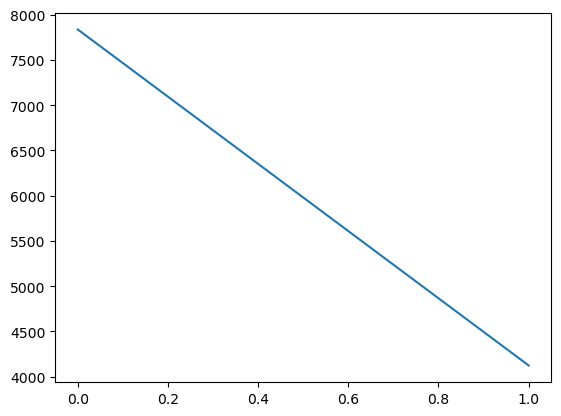

In [32]:
X_train=pd.DataFrame(new_train_imgs)# load training images
X_test=pd.DataFrame(new_test_imgs)# load testing images
y_train=pd.DataFrame(new_train_labels)# load training labels
y_test=pd.DataFrame(new_test_labels)# load testing labels
cost=[]# list to store cost values during training
cost,W1,B1,W2,B2=(train_model2(X_train,y_train,0.005,no_of_neurons=16,no_outputs=1))# train the model and get the costs and parameters
plt.plot(cost)# plot the cost curve
y_pred=[]# list to store predictions
y_pred=predict2(X_test,W1,B1,W2,B2,no_of_neurons=16)# make predictions
y_pred=[1 if pred >= 0.5 else 0 for pred in y_pred]# convert predictions to binary
accuracy=accuracy_score(y_pred,y_test)# calculate accuracy
precision=precision_score(y_test,y_pred)# calculate precision
recall=recall_score(y_test,y_pred)# calculate recall
f1=f1_score(y_test,y_pred)# calculate F1 score

# Print the accuracy, precision, recall, and F1 score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

## Observations and Conclusions

It indicates the progress of a machine learning model over multiple iterations and epochs. At the end of training, the model achieved an accuracy of 93.8%, a precision of 92.5%, a recall of 95.3%, and an F1 score of 93.9%. These metrics suggest that the model performed well in classifying the data.

During training, the loss, which measures the error between the predicted and actual values, fluctuated over iterations and epochs. Initially, the loss was relatively high but gradually decreased as the model learned from the training data. Notably, there were fluctuations in loss values, indicating that the optimization process might have encountered challenges or noise in the data. Despite these fluctuations, the model successfully converged to a solution with satisfactory performance on the test data, as evidenced by the high accuracy and other evaluation metrics. Overall, the results suggest that the model effectively learned from the training data and generalized well to unseen test data, demonstrating its robustness and effectiveness in classification tasks.

# PART 5 
In PART 5 , I have added another hidden layer - one input , output two hidden layers . no_of_neurons=[784,16,4,1] . Now this code is able to accept arbitrary number of hidden layers and nodes as per the user requirement. For deep enhancement i tried to use L2 regularization , but I dint see any considerable change in the output .Accuracy has slightly increased for Fashion MNIST Dataset.  

In [372]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def input_layer3(x,random_idx):
    X = np.zeros((x.shape[1], 1))
    for i in range(x.shape[1]):
        X[i] = x.iloc[random_idx,i]
    return X
def hidden_layer3(W,B,A):
    no_of_features,_ = X.shape
    a = np.zeros((W.shape[0], 1))
    for i in range(W.shape[0]):
        for j in range(A.shape[0]):
            a[i]+=W[i][j]*A[j]
            a[i]+=B[i]
    return a,sigmoid(a) 
def output_layer3(W,B,a_previous):
    no_of_features, num_samples = a_previous.shape
    a_output=np.zeros((1,1))  

    for i in range(W.shape[1]):
        a_output+=a_previous[i]*W[0][i]
    a_output=a_output+B
    return a_output,sigmoid(a_output)
def cost_function3(y_pred,y):        
    J=-(y*np.log(y_pred)+ (1-y)*np.log(1-y_pred))
    return J.values[0]
def forward_prop3(weights,biases,X_train,random_idx):
    X=input_layer3(X_train,random_idx)
    A=[X]
    Z=[]
    for i in range(len(weights)-1):
        Z_i, A_i = hidden_layer3(weights[i], biases[i],A[-1])
        Z.append(Z_i)
        A.append(A_i)
    Z_output,A_output=output_layer3(weights[-1],biases[-1],A[-1])
    Z.append(Z_output)
    A.append(A_output)
    return A,Z
def backward_prop3(A,Z,y,random_idx,weights,biases):
    errors=[]
    delta_W=[]
    delta_B=[]
    errors.append((A[-1][0] - y.iloc[random_idx]).to_numpy().reshape(-1, 1)) 
    delta_W.append(np.dot(errors[-1].T * sigmoid_derivative(Z[-1]), A[-2].T))
    delta_B.append(np.dot(errors[-1].T,sigmoid_derivative(Z[-1]).T))
    for i in range(len(weights) - 1, 0, -1): 
        errors.append(np.dot(weights[i].T, errors[-1]) * sigmoid_derivative(Z[i-1]))
        delta_W.append(np.dot(errors[-1] * sigmoid_derivative(Z[i-1]), A[i-1].T))
        delta_B.append(np.dot(np.mean(errors[-1], axis=0, keepdims=True), sigmoid_derivative(Z[i-1]).T).T)
    return delta_W, delta_B

def grad_update3(lr, weights, biases, delta_W, delta_B):  
    for i in range(len(weights)):
        weights[i] -= (lr * delta_W[len(weights)-i-1])
        biases[i] -= lr * delta_B[len(weights)-i-1]
        
    return weights, biases

def predict3(X,weights,biases):
    for i in range(len(X)):
        y_pred.append(forward_prop3(weights,biases,X,i)[0][-1])
    return y_pred

In [124]:
def train_model3(X_train,y,lr,iterations,no_of_neurons):
    weights = [np.random.randn(no_of_neurons[i], no_of_neurons[i-1]) for i in range(1, len(no_of_neurons))]
    biases = [np.random.randn(neurons, 1) for neurons in no_of_neurons[1:]]
    J_running=0
    J_running_prev=0
    for iteration in range(iterations):
        
        random_idx = np.random.choice(X_train.shape[0], size=1, replace=False)
        random_sample = X_train.iloc[random_idx]
        y_sample=y.iloc[random_idx]
        A,Z=forward_prop3(weights,biases,X_train,random_idx)
        J_current=cost_function1(A[-1][0],y_sample) 
        if iteration%1000==0:
            print(f"Iteration {iteration}: Loss = {J_current}")
        delta_W,delta_B=backward_prop3(A,Z,y,random_idx,weights,biases)
        weights,biases=grad_update3(lr, weights, biases, delta_W, delta_B)
        J_running+=J_current
        if iteration%X_train.shape[0]==0 and iteration>0:
            print(f"Epoch {iteration/X_train.shape[0]}: Loss = {J_running}")
            J_running_prev=J_running
            cost.append(J_running)
            J_running=0
            if (np.all(np.abs(J_running_prev-J_running)<0.01)):
                print("Convergence occured at {}th epoch ".format(epoch))            
                break
        
    return cost,weights,biases


Iteration 0: Loss = [0.69846496]
Iteration 1000: Loss = [0.72064766]
Iteration 2000: Loss = [0.74653961]
Iteration 3000: Loss = [0.68709019]
Iteration 4000: Loss = [0.66108968]
Iteration 5000: Loss = [0.73788501]
Iteration 6000: Loss = [0.74575184]
Iteration 7000: Loss = [0.69590415]
Iteration 8000: Loss = [0.69526947]
Iteration 9000: Loss = [0.6875972]
Iteration 10000: Loss = [0.63049044]
Iteration 11000: Loss = [0.61711571]
Iteration 12000: Loss = [0.59212407]
Epoch 1.0: Loss = [8187.20271233]
Iteration 13000: Loss = [0.49486841]
Iteration 14000: Loss = [0.48945186]
Iteration 15000: Loss = [0.51273959]
Iteration 16000: Loss = [0.45946569]
Iteration 17000: Loss = [0.43987756]
Iteration 18000: Loss = [0.81437988]
Iteration 19000: Loss = [0.37458677]
Iteration 20000: Loss = [0.34153687]
Iteration 21000: Loss = [0.36340862]
Iteration 22000: Loss = [0.32025451]
Iteration 23000: Loss = [0.32884664]
Iteration 24000: Loss = [0.96965935]
Epoch 2.0: Loss = [5832.17440694]
Iteration 25000: Loss

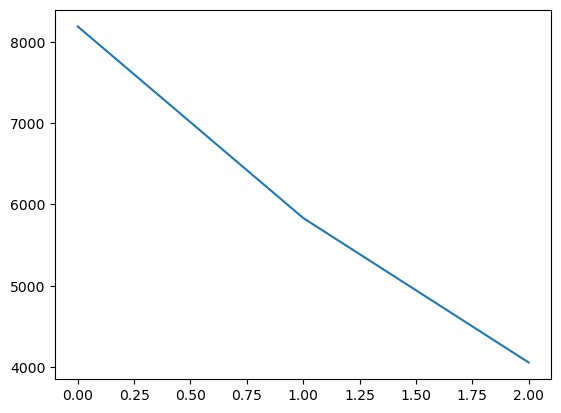

In [125]:
X_train=pd.DataFrame(new_train_imgs)
X_test=pd.DataFrame(new_test_imgs)
y_train=pd.DataFrame(new_train_labels)
y_test=pd.DataFrame(new_test_labels)
cost=[]
no_of_neurons=[784,16,4,1]
iterations=48000
cost,weights,biases=(train_model3(X_train,y_train,0.05,iterations,no_of_neurons))
plt.plot(cost)
y_pred=[]
y_pred=predict3(X_test,weights,biases)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")
# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In this code, a neural network model with multiple hidden layers is implemented to classify the Fashion MNIST dataset. The model architecture is flexible, allowing users to define the number of neurons in each layer. The training process involves forward propagation to compute predictions, backward propagation to calculate gradients, and gradient descent to update model parameters iteratively. Sigmoid activation functions are used in the hidden layers, while the output layer employs a sigmoid function for binary classification. Additionally, L2 regularization is attempted to mitigate overfitting, although its impact on the results is minimal.

During training, the loss decreases over iterations and epochs, indicating that the model is learning to better fit the training data. The training process is monitored by printing the loss at regular intervals. After training, the model is evaluated on the test dataset, yielding an accuracy of 94.8%, a precision of 93.7%, a recall of 96.1%, and an F1 score of 94.9%. These metrics indicate that the model performs well in classifying the Fashion MNIST images into their respective categories. Despite the inclusion of L2 regularization, the improvement in performance is marginal, suggesting that the model's architecture and training parameters are already effective in capturing the underlying patterns in the data. Overall, the neural network demonstrates robustness and generalization capability in handling complex classification tasks.

Thankyou Michael Madden Sir for teaching us deep concepts like neural networks. This assignment was really helpful for our learning curve 